In [60]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [9]:
download.file("https://archive.ics.uci.edu/static/public/46/hepatitis.zip", "hepatitis_data.zip")

In [10]:
unzip("hepatitis_data.zip", "hepatitis.data")

In [97]:
c_names = c("class", "age" , "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver big", "liver firm", "spleen palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology")
hepatitis_data <- read_csv("hepatitis.data", col_names = c_names) 
hepatitis_data 



Rows: 155 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): steroid, fatigue, malaise, anorexia, liver big, liver firm, spleen...
dbl  (5): class, age, sex, antivirals, histology

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [98]:
hepatitis_data_clean <- hepatitis_data |>
    select(class, age, bilirubin, alk_phosphate, sgot, albumin, protime) |>
    mutate_if(is.character, as.numeric)
hepatitis_data_clean
    

Warning message:
“There were 5 warnings in `mutate()`.
The first warning was:
ℹ In argument: `bilirubin = .Primitive("as.double")(bilirubin)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”


class,age,bilirubin,alk_phosphate,sgot,albumin,protime
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,30,1.0,85,18,4.0,NA
2,50,0.9,135,42,3.5,NA
2,78,0.7,96,32,4.0,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮
2,61,0.8,75,20,4.1,NA
2,53,1.5,81,19,4.1,48
1,43,1.2,100,19,3.1,42


In [55]:
summary(hepatitis_data_2)

 class        age         bilirubin     alk_phosphate         sgot       
 1: 32   Min.   : 7.0   Min.   :0.300   Min.   : 26.00   Min.   : 14.00  
 2:123   1st Qu.:32.0   1st Qu.:0.700   1st Qu.: 74.25   1st Qu.: 31.50  
         Median :39.0   Median :1.000   Median : 85.00   Median : 58.00  
         Mean   :41.2   Mean   :1.428   Mean   :105.33   Mean   : 85.89  
         3rd Qu.:50.0   3rd Qu.:1.500   3rd Qu.:132.25   3rd Qu.:100.50  
         Max.   :78.0   Max.   :8.000   Max.   :295.00   Max.   :648.00  
                        NA's   :6       NA's   :29       NA's   :4       
    albumin         protime      
 Min.   :2.100   Min.   :  0.00  
 1st Qu.:3.400   1st Qu.: 46.00  
 Median :4.000   Median : 61.00  
 Mean   :3.817   Mean   : 61.85  
 3rd Qu.:4.200   3rd Qu.: 76.25  
 Max.   :6.400   Max.   :100.00  
 NA's   :16      NA's   :67      

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 67 rows containing non-finite values (`stat_bin()`).”


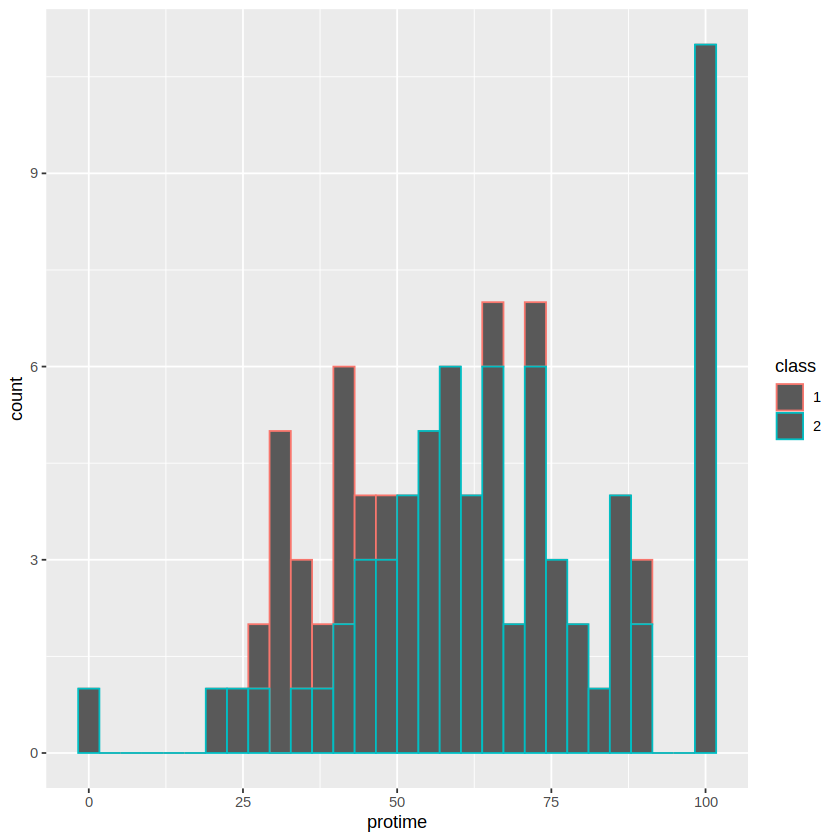

In [95]:
plot_1 <- hepatitis_data_clean |>
    ggplot(aes(x = protime, color = class)) +
    geom_histogram()
plot_1

Warning message:
“Removed 71 rows containing missing values (`geom_point()`).”


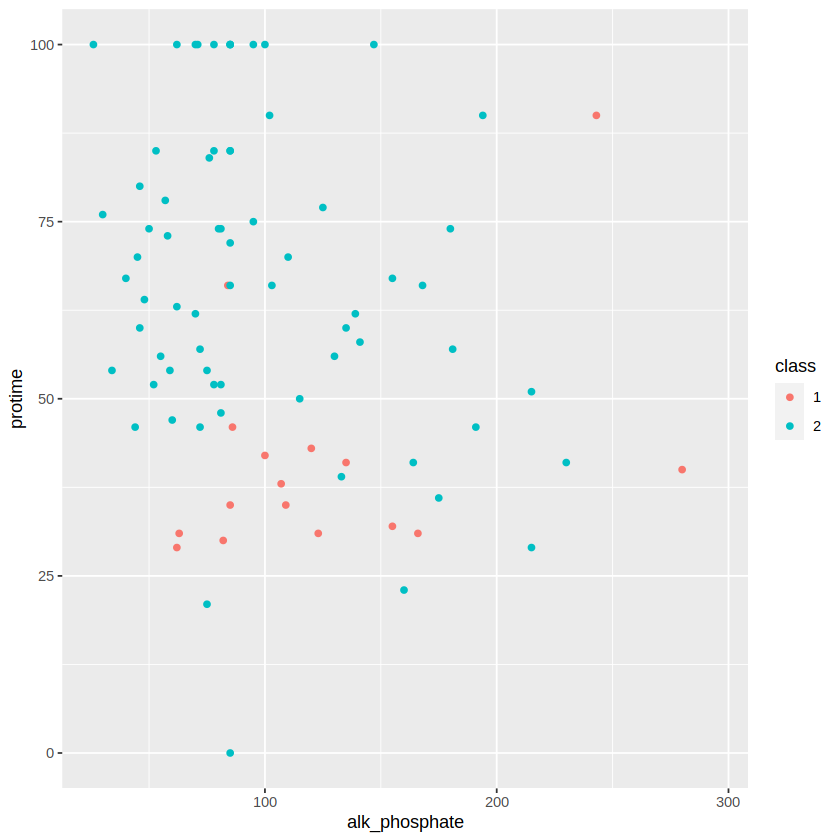

In [85]:
plot_1 <- hepatitis_data_clean |>
    ggplot(aes(x = alk_phosphate, y = protime, color = class)) +
    geom_point()
plot_1

In [118]:
hepatitis_data_clean |> group_by(class) |>
summarise(across(bilirubin:protime, max, na.rm = TRUE))

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(bilirubin:protime, max, na.rm = TRUE)`.
ℹ In group 1: `class = 1`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


class,bilirubin,alk_phosphate,sgot,albumin,protime
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.0,280,528,4.2,90
2,4.6,295,648,6.4,100
